<h1>Elnura Nabigazinova</h1>

In [5]:
import pandas as pd
import sqlite3
import timeit

**import libraries pandas, sqlite, timeit**

In [6]:
df = pd.read_excel('sdu_registration.xlsx', index_col=0)
write_time = {}
read_time = {}

**create dataframe df which include the data from `sdu_registration.xlsx` and create write_time and read_time**

In [7]:
conn = sqlite3.connect("database.sqlite")
start = timeit.default_timer()
df.to_sql('data', con=conn, if_exists='replace')
stop = timeit.default_timer()
write_time['sql'] = stop-start

In [8]:
start = timeit.default_timer()
df.to_csv('file.csv')
stop = timeit.default_timer()
write_time['csv'] = stop-start

In [9]:
start = timeit.default_timer()
df.to_html('file.html')  
stop = timeit.default_timer()
write_time['html'] = stop-start

In [10]:
start = timeit.default_timer()
df.to_json('file.json')
stop = timeit.default_timer()
write_time['json'] = stop-start

In [11]:
start = timeit.default_timer()
df.to_hdf('file.h5', key='data')
stop = timeit.default_timer()
write_time['hdf'] = stop-start

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['EDU_LEVEL', 'CIPHER', 'SPECIALITY', 'EDU_LANG', 'TYPE', 'STUD_ID',
       'DERS_KOD', 'COURSE_TITLE', 'TEACHER'],
      dtype='object')]

  encoding=encoding,


In [12]:
conn = sqlite3.connect("database.sqlite")
start = timeit.default_timer()
pd.read_sql_query('select * from data', con=conn)
stop = timeit.default_timer()
read_time['sql'] = stop-start

In [13]:
start = timeit.default_timer()
pd.read_csv('file.csv')
stop = timeit.default_timer()
read_time['csv'] = stop-start

In [18]:
start = timeit.default_timer()
pd.read_html('file.html')  
stop = timeit.default_timer()
read_time['html'] = stop-start

In [15]:
start = timeit.default_timer()
pd.read_json('file.json')
stop = timeit.default_timer()
read_time['json'] = stop-start

In [16]:
start = timeit.default_timer()
pd.read_hdf('file.h5', key='data')
stop = timeit.default_timer()
read_time['hdf'] = stop-start

**sql, csv, html, json and hdf write and read time from df dataframe**

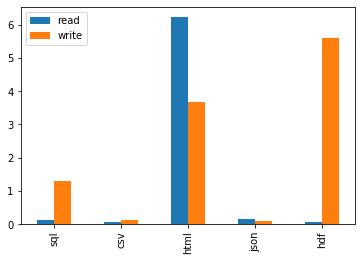

In [19]:
time_df = pd.DataFrame([read_time, write_time])
time_df = time_df.T
time_df.columns = ['read','write']
time_df.plot.bar()


**time_df data frame includes read and write times from sql, csv, html, json and hdf formats**